# Pytorch Tutorial

Goals of this tutorial:
================

-  Understand PyTorch and neural networks.
-  Use a small self-built neural network to classify images (CIFAR10 dataset).

What is PyTorch?
================

It’s a Python-based scientific computing package, that can serve as:

-  A deep learning research platform with high flexibility
   and speed
-  A replacement for NumPy to use the power of GPUs


# Tensors

Tensors are a specialized data structure that are very similar to arrays
and matrices. In PyTorch, we use tensors to encode the inputs and
outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on
GPUs or other specialized hardware to accelerate computing. If you’re familiar with ndarrays, you’ll
be right at home with the Tensor API. If not, follow along in this quick
API walkthrough.


In [1]:
import torch
import numpy as np
print(torch.__version__) # Test if PyTorch is correctly installed.

2.1.1


## Tensor Initialization

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.



In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

print(x_data,x_data.dtype)

tensor([[1, 2],
        [3, 4]]) torch.int64


In [3]:
x_data = torch.Tensor(data)

print(x_data,x_data.dtype)

tensor([[1., 2.],
        [3., 4.]]) torch.float32


**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa - see `bridge-to-np-label`).



In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.



In [5]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1., 1.],
        [1., 1.]]) 

Random Tensor: 
 tensor([[0.4381, 0.2618],
        [0.3629, 0.9735]]) 



**With random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.



In [6]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6068, 0.0616, 0.9981],
        [0.9222, 0.9209, 0.4888]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


--------------




## Tensor Attributes

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [7]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




## Tensor Operations

Over 100 tensor operations, including transposing, indexing, slicing,
mathematical operations, linear algebra, random sampling, and more are
comprehensively described
[here](https://pytorch.org/docs/stable/torch.html)_.

Each of them can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Edit > Notebook
Settings.




In [8]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.




**Standard numpy-like indexing and slicing:**



In [9]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor, tensor.shape)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) torch.Size([4, 4])


**Joining tensors** You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html)_,
another tensor joining op that is subtly different from ``torch.cat``.



In [10]:
t1 = torch.cat([tensor, tensor], dim=0)
print(t1, t1.shape)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) torch.Size([8, 4])


In [11]:
t2 = torch.stack([tensor, tensor], dim=0)
print(t2, t2.shape)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]]) torch.Size([2, 4, 4])


**Multiplying tensors**



In [12]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


This computes the matrix multiplication between two tensors



In [13]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


--------------





# A Gentle Introduction to ``torch.autograd``

``torch.autograd`` is PyTorch’s automatic differentiation engine that powers
neural network training. In this section, you will get a conceptual
understanding of how autograd helps a neural network train.

## Background
Neural networks (NNs) are a collection of nested functions that are
executed on some input data. These functions are defined by *parameters*
(consisting of weights and biases), which in PyTorch are stored in
tensors.

Training a NN happens in two steps:

**Forward Propagation**: In forward prop, the NN makes its best guess
about the correct output. It runs the input data through each of its
functions to make this guess.

**Backward Propagation**: In backprop, the NN adjusts its parameters
proportionate to the error in its guess. It does this by traversing
backwards from the output, collecting the derivatives of the error with
respect to the parameters of the functions (*gradients*), and optimizing
the parameters using gradient descent. For a more detailed walkthrough
of backprop, check out this [video from
3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8)_.




## Usage in PyTorch
Let's take a look at a single training step.
For this example, we load a pretrained resnet18 model from ``torchvision``.
We create a random data tensor to represent a single image with 3 channels, and height & width of 64,
and its corresponding ``label`` initialized to some random values. Label in pretrained models has
shape (1,1000).

<div class="alert alert-info"><h4>Note</h4><p>This tutorial works only on the CPU and will not work on GPU devices (even if tensors are moved to CUDA).</p></div>


In [14]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/firex/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 73.5MB/s]


Next, we run the input data through the model through each of its layers to make a prediction.
This is the **forward pass**.




In [15]:
prediction = model(data) # forward pass

We use the model's prediction and the corresponding label to calculate the error (``loss``).
The next step is to backpropagate this error through the network.
Backward propagation is kicked off when we call ``.backward()`` on the error tensor.
Autograd then calculates and stores the gradients for each model parameter in the parameter's ``.grad`` attribute.




In [16]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

Next, we load an optimizer, in this case SGD with a learning rate of 0.01 and [momentum](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d)_ of 0.9.
We register all the parameters of the model in the optimizer.




In [17]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

Finally, we call ``.step()`` to initiate gradient descent. The optimizer adjusts each parameter by its gradient stored in ``.grad``.




In [18]:
optim.step() #gradient descent

At this point, you have everything you need to train your neural network.
The below sections detail the workings of autograd - feel free to skip them.




--------------




## Differentiation in Autograd
Let's take a look at how ``autograd`` collects gradients. We create two tensors ``a`` and ``b`` with
``requires_grad=True``. This signals to ``autograd`` that every operation on them should be tracked.




In [19]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

We create another tensor ``Q`` from ``a`` and ``b``.

\begin{align}Q = 3a^3 - b^2\end{align}



In [20]:
Q = 3*a**3 - b**2

Let's assume ``a`` and ``b`` to be parameters of an NN, and ``Q``
to be the error. In NN training, we want gradients of the error
w.r.t. parameters, i.e.

\begin{align}\frac{\partial Q}{\partial a} = 9a^2\end{align}

\begin{align}\frac{\partial Q}{\partial b} = -2b\end{align}


When we call ``.backward()`` on ``Q``, autograd calculates these gradients
and stores them in the respective tensors' ``.grad`` attribute.

We need to explicitly pass a ``gradient`` argument in ``Q.backward()`` because it is a vector.
``gradient`` is a tensor of the same shape as ``Q``, and it represents the
gradient of Q w.r.t. itself, i.e.

\begin{align}\frac{dQ}{dQ} = 1\end{align}

Equivalently, we can also aggregate Q into a scalar and call backward implicitly, like ``Q.sum().backward()``.




In [21]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

Gradients are now deposited in ``a.grad`` and ``b.grad``



In [22]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [23]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In a NN, parameters that don't compute gradients are usually called **frozen parameters**.
It is useful to "freeze" part of your model if you know in advance that you won't need the gradients of those parameters
(this offers some performance benefits by reducing autograd computations).

In finetuning, we freeze most of the model and typically only modify the classifier layers to make predictions on new labels.
Let's walk through a small example to demonstrate this. As before, we load a pretrained resnet18 model, and freeze all the parameters.



In [24]:
from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(512, 10)

# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

Let's say we want to finetune the model on a new dataset with 10 labels.
In resnet, the classifier is the last linear layer ``model.fc``.
We can simply replace it with a new linear layer (unfrozen by default)
that acts as our classifier.



Now all parameters in the model, except the parameters of ``model.fc``, are frozen.
The only parameters that compute gradients are the weights and bias of ``model.fc``.




## Neural Networks

Neural networks can be constructed using the ``torch.nn`` package.

Now that you had a glimpse of ``autograd``, ``nn`` depends on
``autograd`` to define models and differentiate them.
An ``nn.Module`` contains layers, and a method ``forward(input)`` that
returns the ``output``.

For example, look at this network that classifies digit images:

.. figure:: ./mnist.png
   :alt: convnet
mn
   convnet

It is a simple feed-forward network. It takes the input, feeds it
through several layers one after the other, and then finally gives the
output.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
  ``weight = weight - learning_rate * gradient``

## Define the network

Let’s define this network:


In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the ``forward`` function, and the ``backward``
function (where gradients are computed) is automatically defined for you
using ``autograd``.
You can use any of the Tensor operations in the ``forward`` function.

The learnable parameters of a model are returned by ``net.parameters()``



In [26]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


Let's try a random 3x32x32 input.
Note: expected input size of this net (LeNet) is 32x32. To use this net on
the MNIST dataset, please resize the images from the dataset to 1x32x32.



In [27]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0142, -0.0355,  0.0065,  0.0686,  0.0509,  0.0503, -0.1233,  0.0629,
          0.0202, -0.0623]], grad_fn=<AddmmBackward0>)


Zero the gradient buffers of all parameters and backprops with random
gradients:



In [28]:
net.zero_grad()
out.backward(torch.randn(1, 10))

<div class="alert alert-info"><h4>Note</h4><p>``torch.nn`` only supports mini-batches. The entire ``torch.nn``
    package only supports inputs that are a mini-batch of samples, and not
    a single sample.

    For example, ``nn.Conv2d`` will take in a 4D Tensor of
    ``nSamples x nChannels x Height x Width``.

    If you have a single sample, just use ``input.unsqueeze(0)`` to add
    a fake batch dimension.
  </p></div>

Before proceeding further, let's recap all the classes you’ve seen so far.

**Recap:**
  -  ``torch.Tensor`` - A *multi-dimensional array* with support for autograd
     operations like ``backward()``. Also *holds the gradient* w.r.t. the
     tensor.
  -  ``nn.Module`` - Neural network module. *Convenient way of
     encapsulating parameters*, with helpers for moving them to GPU,
     exporting, loading, etc.
  -  ``nn.Parameter`` - A kind of Tensor, that is *automatically
     registered as a parameter when assigned as an attribute to a*
     ``Module``.
  -  ``autograd.Function`` - Implements *forward and backward definitions
     of an autograd operation*. Every ``Tensor`` operation creates at
     least a single ``Function`` node that connects to functions that
     created a ``Tensor`` and *encodes its history*.

**At this point, we covered:**
  -  Defining a neural network
  -  Processing inputs and calling backward

**Still Left:**
  -  Computing the loss
  -  Updating the weights of the network

## Loss Function
A loss function takes the (output, target) pair of inputs, and computes a
value that estimates how far away the output is from the target.

There are several different
[loss functions](https://pytorch.org/docs/nn.html#loss-functions) under the
nn package .
A simple loss is: ``nn.MSELoss`` which computes the mean-squared error
between the output and the target.

For example:



In [29]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.5764, grad_fn=<MseLossBackward0>)


Now, if you follow ``loss`` in the backward direction, using its
``.grad_fn`` attribute, you will see a graph of computations that looks
like this:

```sh
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> flatten -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss
```
So, when we call ``loss.backward()``, the whole graph is differentiated
w.r.t. the neural net parameters, and all Tensors in the graph that have
``requires_grad=True`` will have their ``.grad`` Tensor accumulated with the
gradient.

For illustration, let us follow a few steps backward:



In [30]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## Backprop
To backpropagate the error all we have to do is to ``loss.backward()``.
You need to clear the existing gradients though, else gradients will be
accumulated to existing gradients.


Now we shall call ``loss.backward()``, and have a look at conv1's bias
gradients before and after the backward.



In [31]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0100,  0.0068,  0.0125,  0.0278,  0.0084, -0.0101])


Now, we have seen how to use loss functions.

**Read Later:**

  The neural network package contains various modules and loss functions
  that form the building blocks of deep neural networks. A full list with
  documentation is [here](https://pytorch.org/docs/nn).

**The only thing left to learn is:**

  - Updating the weights of the network

## Update the weights
The simplest update rule used in practice is the Stochastic Gradient
Descent (SGD):

In [32]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

<div class="alert alert-info"><h4>Note</h4><p>Observe how gradient buffers had to be manually set to zero using
      ``optimizer.zero_grad()``. This is because gradients are accumulated
      as explained in the `Backprop`_ section.</p></div>



CNN for MNIST Handwritten Digit Classification
=====================

You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

## What about data?

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
ImageNet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

In this part, we will solve the handwriting digits classification task using a simple CNN. Let's look at the dataset first.

MNIST Dataset
------------------

The MNIST [1] database of handwritten digits, available from [this page](http://yann.lecun.com/exdb/mnist/), has a training set of 60,000 examples, and a test set of 10,000 examples. The size of the digital image is $28 \times 28$.

We can easily get this dataset by using `torchvision` package.
The `torchvision` package consists of popular datasets (`torchvision.datasets`), model architectures (`torchvision.models`), and common image transformations (`torchvision.transforms`) for computer vision. It can save a lot of time for you.

Okay, let's load the dataset.

In [33]:
from torchvision import datasets # To load mnist dataset
from torchvision import transforms # To do some pre-processing, e.g. normalization.
# Set dataset
train_dataset = datasets.MNIST(root='./data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data/', train=False, transform=transforms.ToTensor(), download=True)
    # train-images-idx3-ubyte: training set images
    # train-labels-idx1-ubyte: training set labels
    # t10k-images-idx3-ubyte:  test set images
    # t10k-labels-idx1-ubyte:  test set labels
# Preview the attributes
print(train_dataset)
print(test_dataset)
# Let's load the dataset!
batchSize=64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batchSize, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 38038266.57it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 41988108.78it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 24836568.06it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 9252320.92it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
    StandardTransform
Transform: ToTensor()


Then, let's visualise some of them.
<!--iter(train_loader):
     torch.utils.data.dataloader._SingleProcessDataLoaderIter object -->

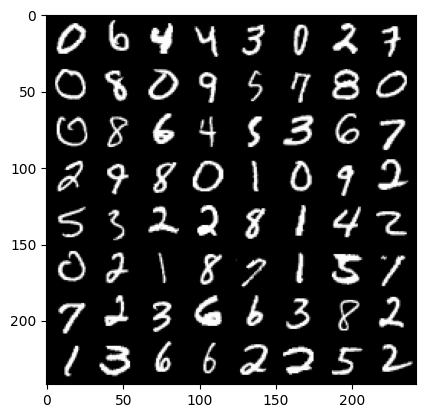

tensor([0, 6, 4, 4, 3, 0, 2, 7, 0, 8, 0, 9, 5, 7, 8, 0, 0, 8, 6, 4, 5, 3, 6, 7,
        2, 9, 8, 0, 1, 0, 9, 2, 5, 3, 2, 2, 8, 1, 4, 2, 0, 2, 1, 8, 7, 1, 5, 1,
        7, 2, 3, 6, 6, 3, 8, 2, 1, 3, 6, 6, 2, 2, 5, 2])


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
print(dataiter)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
print(labels)

Understanding Convolutions
------------------
Start with a kernel, which is simply a small matrix of weights. This kernel “slides” over the input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel. When sliding, we have a hyper-parameter named `stride` to control how the filter convolves around the input data.  

For example, we have a $3 \times 3$ kernel with weights of $$\begin{pmatrix}
 0& 1 & 2\\
 2& 2 & 0\\
 0& 1 & 2
\end{pmatrix}$$

And the input data is $$\begin{pmatrix}
3 & 3 & 2 & 1 & 0\\
0 & 0 & 1 & 3 & 1\\
3 & 1 & 2 & 2 & 3\\
2 & 0 & 0 & 2 & 2\\
2 & 0 & 0 & 0 & 1
\end{pmatrix}$$

If we set the `stride`=1, then the convolution operation is

The first element in the output data is obtained by $$\begin{pmatrix}
 3& 3 & 2\\
 0& 0 & 1\\
 3& 1 & 2
\end{pmatrix}  \times \begin{pmatrix}
 0& 1 & 2\\
 2& 2 & 0\\
 0& 1 & 2
\end{pmatrix} = 12$$

We notice that the shape of the output is smaller than the input, in order to keep the shape of the data, we can 'padding' the input data before doing convlution. One of the most popular method is zero padding, i.e. we enlarge the input data with '0'. After padding, the shape of the output data will not change.


For our CW1, in order to make the output (SR image) has the same size as the ground truth (HR image), we do need to  padding each layer.

Understanding receptive field
------------------
As we seen, if we apply a $3 \times 3$ kernel on a $5 \times 5$ input without padding and stride is 1, the output would be a $3 \times 3$ feature map. Each element in the output feature map corresponding to a $3 \times 3$ matrix in the input data. So we have a $3 \times 3$ receptive field in this layer.

If we further have a convlution with another $3 \times 3$ kernel and no padding and stride is 1, the output of this convlutional layer will be a single value! And this value comes from the $5 \times 5$ region in the input data. From another perspective, this is equal to apply a $5 \times 5$ kernel on a $5 \times 5$ input.

That is to say, deeper the network is, bigger the receptive field is.

Define a LeNet5
------------------

LeNet5 [1] is a convolutional neural network structure proposed by Yann LeCun et al. in 1998. It is designed for handwritten and machine-printed character (0-9) recognition.

This is the network architecture of LeNet5. The size of the input image is $32 \times 32$.

Neural networks can be constructed using the ``torch.nn`` package. It's a base class for all neural network modules. We can find a lot of useful components to build a network, like convolutional layer, fully connected layer, and pooling layer. Let's build a simple LeNet5 first.

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class LeNet5(nn.Module):

    def __init__(self):
        super(LeNet5, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        # Convolution (Attention: 28x28-->32*32 to fit LeNet5)
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        # Max-pooling
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Fully connected layer
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):

        # conv, then perform ReLU non-linearity
        # Max pooling over a (2, 2) window
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch dimension
        # FC, then perform ReLU non-linearity
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = LeNet5()
print(net)

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [36]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # check GPU availability

net = LeNet5().to(device) # Using GPU for training

### 3. Define a Loss function and optimizer
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [37]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Train the LeNet5
------------------
A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights. Like Conv2d, nn.Linear)
- Process input (e.g. images), through the network
- Compute the loss (how far is the output from being correct)
- Compute the backward gradients over the parameters of the network
- Update the parameters of the network, typically using a simple update rule:
    $weight = weight - learning\_rate * gradient$
  
After training, we get the parameters of the network (model). We can save the trained model by calling `torch.save(model.state_dict(),PATH)` function.

In [38]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 500:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 2.296
[2,   500] loss: 0.751
[3,   500] loss: 0.288
[4,   500] loss: 0.191
[5,   500] loss: 0.149
[6,   500] loss: 0.120
[7,   500] loss: 0.104
[8,   500] loss: 0.093
[9,   500] loss: 0.083
[10,   500] loss: 0.077
Finished Training


In [39]:
PATH = './lenet5_mnist.pth'
torch.save(net.state_dict(), PATH)

Test the LeNet5
------------------
Next, let's load back in our saved model to test the accuracy on testing set.

In [40]:
# Create a Lenet5 and load the save parameters.
net = LeNet5()
net.load_state_dict(torch.load('./lenet5_mnist.pth'))

<All keys matched successfully>

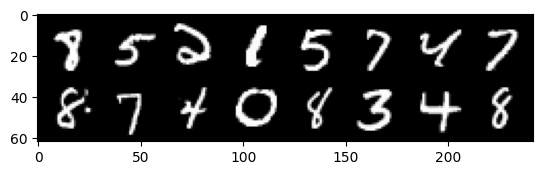

tensor([8, 5, 2, 1, 5, 7, 4, 7, 8, 7, 4, 0, 8, 3, 4, 8])


In [41]:
# Load the test images
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=16, shuffle=True)
# get some random test images
images, labels = next(iter(test_loader))
# show images
imshow(torchvision.utils.make_grid(images))
print(labels)

In [42]:
# Feed the images to the network, then we get outputs, which are the probability values for all the calsses
with torch.no_grad(): # We don't want to update parameters during the test stage
    outputs = net(images)
# We pick the one with max probability as the prediction
predicted = torch.max(outputs, 1)
print(predicted.indices)

tensor([8, 5, 2, 1, 5, 7, 4, 7, 8, 7, 4, 0, 8, 3, 4, 8])


It seems our model did a great job! Let's look at the performance on the overall test set.

In [43]:
def test(model, test_loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    print('Test set: Accuracy: {}/{} ({:.2f}%)'.format(correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [44]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)
test(net, test_loader)

Test set: Accuracy: 9793/10000 (97.93%)



# (Optional) CNN for CIFAR10 image classification



For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: ./CIFAR10.png
   :alt: cifar10

   cifar10


## Training an image classifier

We will do the following steps in order:

1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1. Load and normalize CIFAR10

Using ``torchvision``, it’s extremely easy to load CIFAR10.


In [45]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



<div class="alert alert-info"><h4>Note</h4><p>If running on Windows and you get a BrokenPipeError, try setting
    the num_worker of torch.utils.data.DataLoader() to 0.</p></div>



In [46]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:07<00:00, 23527233.81it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



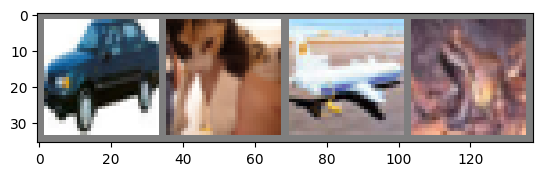

car   cat   plane frog 


In [47]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### 2. Define a Convolutional Neural Network
Copy the neural network from the Neural Networks section before. But we need to modify the input channel from 1 to 3. In addition, we don't need the padding implementation for CIFAR10 dataset since the input image size is 3x32x32.



In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class LeNet5(nn.Module):

    def __init__(self):
        super(LeNet5, self).__init__()
        # 3 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Max-pooling
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Fully connected layer
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):

        # conv, then perform ReLU non-linearity
        # Max pooling over a (2, 2) window
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch dimension
        # FC, then perform ReLU non-linearity
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = LeNet5()
print(net)

LeNet5(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [49]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

net = LeNet5().to(device)

### 3. Define a Loss function and optimizer
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [50]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Train the network

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [51]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 5000 == 4999:    # print every 5000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 5000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  5000] loss: 1.965
[1, 10000] loss: 1.558
[2,  5000] loss: 1.373
[2, 10000] loss: 1.300
[3,  5000] loss: 1.203
[3, 10000] loss: 1.177
[4,  5000] loss: 1.084
[4, 10000] loss: 1.088
[5,  5000] loss: 1.011
[5, 10000] loss: 1.024
[6,  5000] loss: 0.940
[6, 10000] loss: 0.969
[7,  5000] loss: 0.894
[7, 10000] loss: 0.936
[8,  5000] loss: 0.866
[8, 10000] loss: 0.882
[9,  5000] loss: 0.805
[9, 10000] loss: 0.862
[10,  5000] loss: 0.774
[10, 10000] loss: 0.832
Finished Training


Let's quickly save our trained model:



In [52]:
PATH = './lenet_cifar10.pth'
torch.save(net.state_dict(), PATH)

See [here](https://pytorch.org/docs/stable/notes/serialization.html)
for more details on saving PyTorch models.

### 5. Test the network on the test data

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



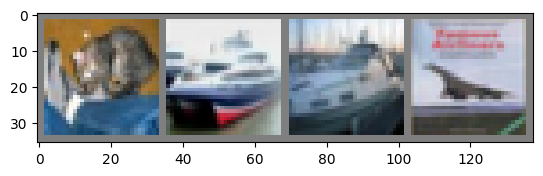

GroundTruth:  cat   ship  ship  plane


In [53]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Next, let's load back in our saved model (note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so):



In [54]:
net = LeNet5()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above are:



In [55]:
outputs = net(images)

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [56]:
_, predicted = torch.max(outputs, 1)


print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [57]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 62 %


That looks way better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [58]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 61.0 %
Accuracy for class: car   is 75.3 %
Accuracy for class: bird  is 41.7 %
Accuracy for class: cat   is 47.3 %
Accuracy for class: deer  is 62.8 %
Accuracy for class: dog   is 55.4 %
Accuracy for class: frog  is 64.6 %
Accuracy for class: horse is 67.9 %
Accuracy for class: ship  is 80.3 %
Accuracy for class: truck is 72.7 %


**References**

[1] LeCun, Yann, et al. "Gradient-based learning applied to document recognition." Proceedings of the IEEE 86.11 (1998): 2278-2324.

[2] Deep Learning with PyTorch. https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html